<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#The-Bulding-Blocks">The Bulding Blocks</a></li>
<li><a class="" href="#Mobjects">Mobjects</a></li>
<ol><li><a class="" href="#Creating-and-displaying-mobjects">Creating and displaying mobjects</a></li>
<li><a class="" href="#Placing-mobjects">Placing mobjects</a></li>
<ol><li><a class="" href="#Set-Positions">Set Positions</a></li>
<li><a class="" href="#Get-Positions">Get Positions</a></li>
</ol><li><a class="" href="#Scaling,-Stretching-and-Rotating">Scaling, Stretching and Rotating</a></li>
<ol><li><a class="" href="#Scaling-and-Stretching">Scaling and Stretching</a></li>
<li><a class="" href="#Rotating">Rotating</a></li>
</ol><li><a class="" href="#Colors-and-Opacity">Colors and Opacity</a></li>
<ol><li><a class="" href="#Colors">Colors</a></li>
<li><a class="" href="#Opacitiy">Opacitiy</a></li>
<li><a class="" href="#Stroke-Width">Stroke Width</a></li>
</ol><li><a class="" href="#Layers">Layers</a></li>
<ol><li><a class="" href="#submobjects">submobjects</a></li>
<li><a class="" href="#z_index">z_index</a></li>
</ol><li><a class="" href="#Some-More-Things">Some More Things</a></li>
<ol><li><a class="" href="#VGroup">VGroup</a></li>
<li><a class="" href="#Group">Group</a></li>
<li><a class="" href="#Making-Mobject-Classes">Making Mobject Classes</a></li>
</ol>

# Imports

In [1]:
from manim import *
config.media_embed = True

Manim Community v0.17.2

In [2]:
param = "-v WARNING  --progress_bar None -ql -s -r 600,300 --disable_caching Example"
paramVideo = "-v WARNING  --progress_bar None -ql -r 600,300 --disable_caching ExampleVideo"

[Reference 1](https://docs.manim.community/en/stable/tutorials/building_blocks.html)

[Reference 2](https://flyingframes.readthedocs.io/en/latest/ch3.html)

# The Bulding Blocks

Manim has three bulding blocks:

1. Mathmatical Object, mobjects `Mobject` Class
2. Animation, `Animation` Class
3. Scenes, `Scene` Class

In this notebook, we'll work with just Mobjects.

# Mobjects

Mobjects are the basic building blocks for all manim animations. Each class that derives from `Mobject` represents an object that can be displayed on the screen. For example, simple shapes such as `Circle`, `Arrow`, and `Rectangle` are all mobjects. More complicated constructs such as `Axes`, `FunctionGraph`, or `BarChart` are mobjects as well.

If you try to display an instance of `Mobject` on the screen, you will only see an empty frame. The reason is that the `Mobject` class is an abstract base class of all other mobjects. Usually, you will create instances of its derived classes. One of these derived classes is `VMobject`. The V stands for Vectorized Mobject. In essence, a vmobject is a mobject that uses vector graphics to be displayed.

>Any object that can be displayed on the screen is a mobject, even if it is not necessarily mathematical in nature.

Let's get started!

## Creating and displaying mobjects

Usually all of the code in a manim script is put inside the `construct()` method of a Scene class. To display a mobject on the screen, call the `add()` method of the containing `Scene`. This is the principal way of displaying a mobject on the screen when it is not being animated. To remove a mobject from the screen, simply call the `remove()` method from the containing `Scene`.

In [3]:
%%manim $paramVideo
class ExampleVideo(Scene):
    def construct(self):
        circle = Circle()
        self.add(circle)
        self.wait(1)
        self.remove(circle)
        self.wait(1)

## Placing mobjects

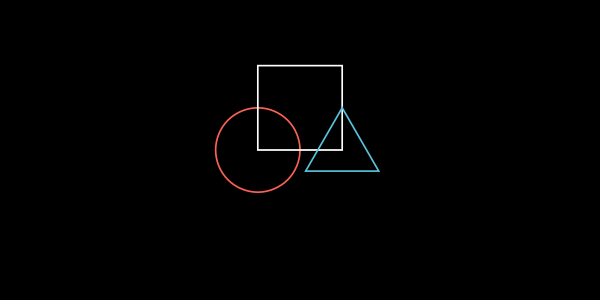

In [4]:
%%manim $param
class Example(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()

        circle.shift(LEFT)
        square.shift(UP)
        triangle.shift(RIGHT)

        self.add(circle, square, triangle)

By default, mobjects are placed at the center of coordinates, or origin, when they are first created. They are also given some default colors. Further, the Shapes scene places the mobjects by using the `shift()` method. The square is shifted one unit in the `UP` direction from the origin, while the circle and triangle are shifted one unit `LEFT` and `RIGHT`, respectively.

>manim places the center of coordinates at the center of the screen. The positive vertical direction is up, and the positive horizontal direction is right. 

In [5]:
ORIGIN, LEFT

(array([0., 0., 0.]), array([-1.,  0.,  0.]))

There are many other possible ways to place mobjects on the screen. Let's talk about some of them.

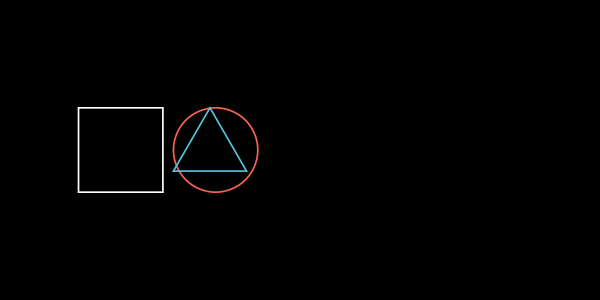

In [6]:
%%manim $param

class Example(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()

        # place the circle two units left from the origin
        circle.move_to(LEFT * 2)
        # place the square to the left of the circle
        square.next_to(circle, LEFT)
        # align the left border of the triangle to the left border of the circle
        triangle.align_to(circle, LEFT)

        self.add(circle, square, triangle)

The `move_to()` method uses absolute units (measured relative to the `ORIGIN`), while `next_to()` uses relative units (measured from the mobject passed as the first argument). `align_to()` uses `LEFT` not as measuring units but as a way to determine the border to use for alignment. The coordinates of the borders of a mobject are determined using an imaginary bounding box around it.

### Set Positions

Some important methods to set the position of a mobject are:

- `move_to()`
- `shift()`
- `next_to()`
- `align_to()`
- `to_corner()`
- `to_edge()`
- `arrange()`
- `arrange_in_grid()`

Let's see some examples:

In [7]:
param = "-v WARNING  --progress_bar None -ql -s -r 400,100 --disable_caching Example"

In [8]:
dORIGIN= Dot(color= BLUE,radius=0.5)

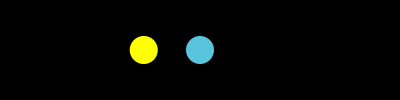

In [9]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.move_to(-2*RIGHT)
        self.add(dORIGIN, d)

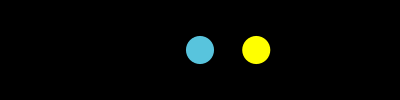

In [10]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.shift(2*RIGHT)
        self.add(dORIGIN, d)

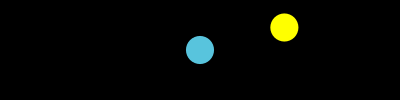

In [11]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW, radius=0.5)
        d.shift(3*RIGHT+0.8*UP)
        self.add(dORIGIN, d)

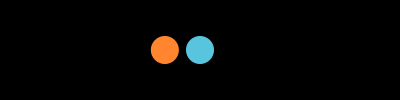

In [12]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT)
        self.add(dORIGIN, d)

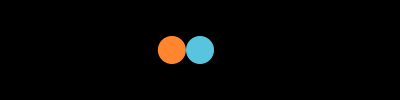

In [13]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT, buff=0)
        self.add(dORIGIN, d)

`buff=0` means that the mobjects will be touching each other. `buff=0.5` means that there will be a gap of 0.5 units between the mobjects. You can use negative values for `buff` to make the mobjects overlap.

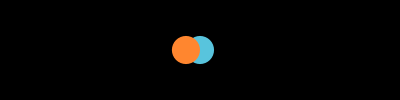

In [14]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT, buff=-0.5)
        self.add(dORIGIN, d)

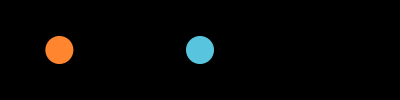

In [15]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, LEFT, buff=4)
        self.add(dORIGIN, d)

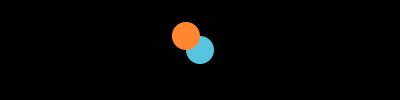

In [16]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.next_to(dORIGIN, UL,buff=-0.5) # UL is UPLEFT
        self.add(dORIGIN, d)

Note that `UL` means upper left, `DR` means down right, and so on.

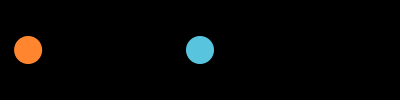

In [17]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= ORANGE, radius=0.5)
        d.to_edge(LEFT)
        self.add(dORIGIN, d)

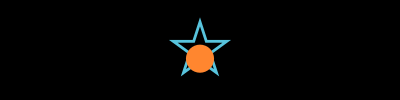

In [18]:
%%manim $param
class Example(Scene):
    def construct(self):
        s= Star(stroke_width=10)
        d=Dot(color= ORANGE, radius=0.5)
        d.align_to(s,DOWN)
        self.add(s,d)

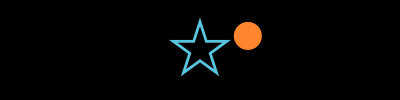

In [19]:
%%manim $param
class Example(Scene):
    def construct(self):
        s= Star(stroke_width=10)
        d=Dot(color= ORANGE, radius=0.5)
        d.next_to(s,RIGHT, aligned_edge=UP) #next to and align combined
        self.add(s,d)

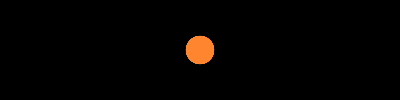

In [20]:
%%manim $param
class Example(Scene):
    def construct(self):
        for i in range(0,10):
            self.add(Dot(color= ORANGE, radius=0.5))
        # VGroup(*self.mobjects).arrange()

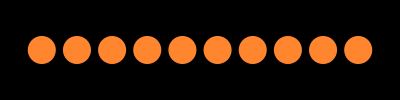

In [21]:
%%manim $param
class Example(Scene):
    def construct(self):
        for i in range(0,10):
            self.add(Dot(color= ORANGE, radius=0.5))
        VGroup(*self.mobjects).arrange()

`arrange` arranges the mobjects in a row or column. The default is a row, which is done by using `arrange(LEFT)` or `arrange(RIGHT)`. Using `UP` or `DOWN` arranges them in a column.

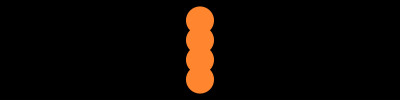

In [22]:
%%manim $param
class Example(Scene):
    def construct(self):
        for i in range(0,4):
            self.add(Dot(color= ORANGE, radius=0.5))
        VGroup(*self.mobjects).arrange(UP, buff=-0.3)

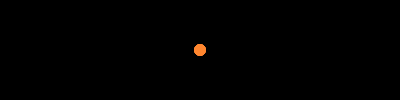

In [23]:
%%manim $param
class Example(Scene):
    def construct(self):
        for i in range(0,24):
            self.add(Dot(color= ORANGE, radius=0.2))
        # VGroup(*self.mobjects).arrange_in_grid(cols=6)

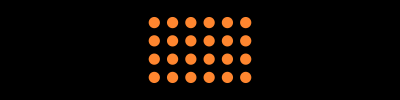

In [24]:
%%manim $param
class Example(Scene):
    def construct(self):
        for i in range(0,24):
            self.add(Dot(color= ORANGE, radius=0.2))
        VGroup(*self.mobjects).arrange_in_grid(cols=6)

### Get Positions

Important methods to get the position of a mobject are:

- `get_center()`
- `get_top()`
- `get_bottom()`
- `get_left()`
- `get_right()`
- `get_start()`

In [25]:
s= Star(stroke_width=10)
d=Dot(color= YELLOW, radius=0.2)

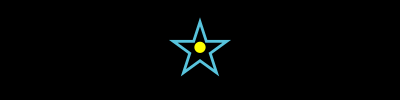

In [26]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_center()
        self.add(s, d.shift(pos))

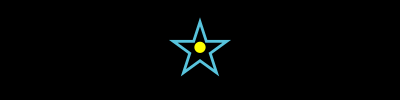

In [27]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_center()
        self.add(s, d.move_to(pos))

> There is a very subtle difference between `move_to` and `shift`. `shift` is shifting the mobject. Calling it twice will shift the mobject twice. `move_to` is moving the mobject to a specific point. Calling it twice will move the mobject to the second point.

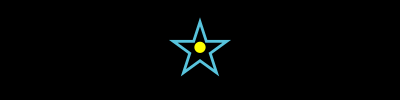

In [28]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_center_of_mass()
        self.add(s, d.shift(pos))

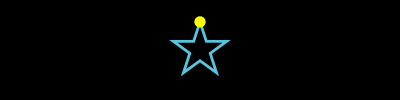

In [29]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_top()
        self.add(s, d.move_to(pos))

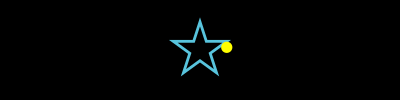

In [30]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_right()
        self.add(s, d.move_to(pos))

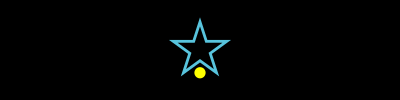

In [31]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_bottom()
        self.add(s, d.move_to(pos))

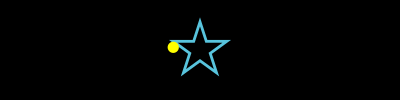

In [32]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_left()
        self.add(s, d.move_to(pos))

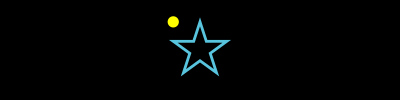

In [33]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_corner(UL)
        self.add(s, d.move_to(pos))

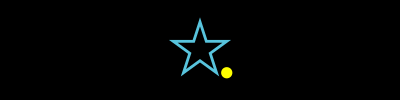

In [34]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= s.get_corner(DR)
        self.add(s, d.move_to(pos))

To see what `get_start` and `get_end` do, let's create an arc and see what happens when we call these methods:

In [35]:
arc= Arc(radius=1.0, start_angle=-PI/16, angle=PI, stroke_width=10)

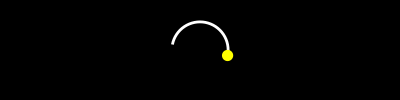

In [36]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= arc.get_start()
        self.add(arc, d.move_to(pos))

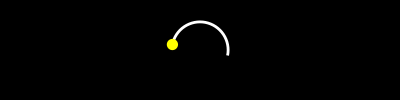

In [37]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= arc.get_end()
        self.add(arc, d.move_to(pos))

So, `get_start` returns the starting point of the mobject, and `get_end` returns the ending point of the mobject. There are some more methods which we can call. Let's see some more examples:

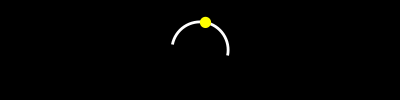

In [38]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= arc.get_midpoint()
        self.add(arc, d.move_to(pos))

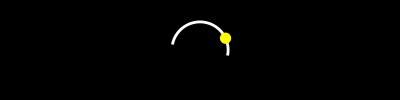

In [39]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= arc.point_from_proportion(0.2)
        self.add(arc, d.move_to(pos))

For `Arc`, we have some more methods:

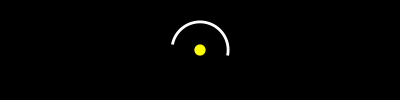

In [40]:
%%manim $param
class Example(Scene):
    def construct(self):
        pos= arc.get_arc_center()
        self.add(arc, d.move_to(pos))

There are some more methods which get or set the x and y coordinates. Let's see some examples:

3.0


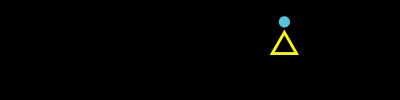

In [41]:
%%manim $param
class Example(Scene): #Example for `get_x` , `get_y`, `set_x` and `set_y`
    def construct(self):
        d = Dot(point=[3,1,0],radius=0.2,color= BLUE)
        triangle= Triangle(color=YELLOW, stroke_width=10).scale(0.5)
        x_pos=d.get_x()
        print(x_pos)
        triangle.set_x(x_pos)
        self.add(d, triangle)

1.0


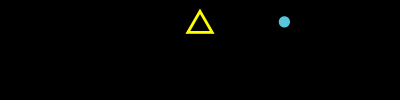

In [42]:
%%manim $param
class Example(Scene): #Example for `get_x` , `get_y`, `set_x` and `set_y`
    def construct(self):
        d = Dot(point=[3,1,0],radius=0.2,color= BLUE)
        triangle= Triangle(color=YELLOW, stroke_width=10).scale(0.5)
        y_pos=d.get_y()
        print(y_pos)
        triangle.set_y(y_pos)
        self.add(d, triangle)

The `set_x` and `set_y` methods set the x and y coordinates of the mobject. The `get_x` and `get_y` methods get the x and y coordinates of the mobject. We see, for the triangle that when we set the x-coordinate, the traingle is shifted to that x position with y coordinate still being 0. Similarly, when we set the y-coordinate, the traingle is shifted to that y position with x coordinate still being 0.

## Scaling, Stretching and Rotating

Manim provides a number of methods to scale, stretch, and rotate mobjects. The most important ones are shown as examples below.

### Scaling and Stretching

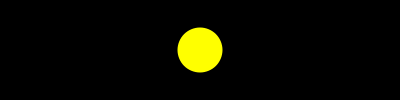

In [43]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        self.add(d)

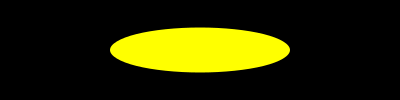

In [44]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.stretch(4, dim = 0) # dim = 0 means vertical
        self.add(d)

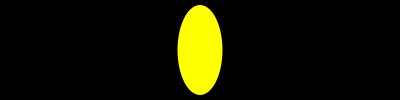

In [45]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.stretch(2, dim = 1) # dim = 1 means horizontal
        self.add(d)

We see that scaling can be done horizonatly or vertically by passing the `dim` argument. We can also apply matrix transformations to the mobjects. For example:

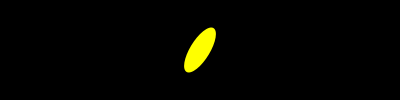

In [46]:
%%manim $param
class Example(Scene):
    def construct(self):
        d= Dot(color= YELLOW)
        d.scale(10)
        d.apply_matrix([[0.5, 0.5, 0], # shear matrix
                        [ 0 ,  1 , 0],
                        [ 0 ,  0 , 1]])
        self.add(d)

In [47]:
d= Dot(color= YELLOW)
d.scale(10)
d.apply_matrix([[0.5, 0.5, 0], # shear matrix
                [ 0 ,  1 , 0],
                [ 0 ,  0 , 1]])


Dot

The code not only scales but also applies a matrix to the mobject, which is basically a raotation. There are other, more easier ways to rotate a mobject. Let's see some examples:

### Rotating

In [48]:
parambigger = '-v WARNING  --progress_bar None -ql -s -r 400,120 --disable_caching Example'

Here, we'll see some examples of rotating about a point.

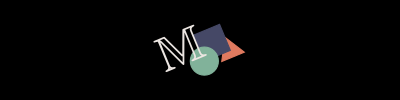

In [49]:
%%manim $param
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(PI/8)
        self.add(m)

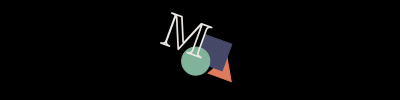

In [50]:
%%manim $param
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(-20*DEGREES)
        self.add(m)

The `mobject.rotate` method takes the angle by which rotation has to be performed. By default, the rotation is performed about the origin and the angle is given in radian. In second example, we saw how to pass degrees as the angle. Now, we'll have a look on how to rotate about a point other than the origin.

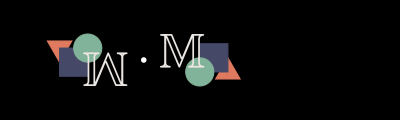

In [51]:
%%manim $parambigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        self.add(m.copy())
        m.rotate(about_point=2*LEFT, angle=180*DEGREES)
        self.add(m, Dot(2*LEFT,radius=0.1))

Let's consider the situation when rotation about an axis is performed.

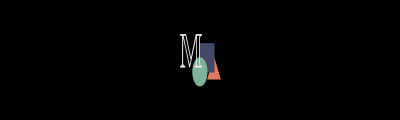

In [52]:
%%manim $parambigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(axis=UP,angle=60*DEGREES)
        self.add(m)

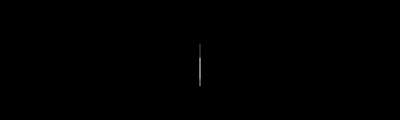

In [53]:
%%manim $parambigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(axis=UP,angle=90*DEGREES)
        self.add(m)

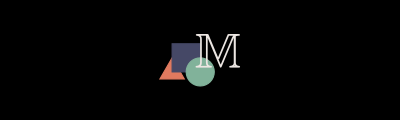

In [54]:
%%manim $parambigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.rotate(axis=UP,angle=180*DEGREES)
        self.add(m)

When we are rotating about a point, the axis of rotation is perpendicular to the xy-plane (same plane as the image). In case when an axis is given, the axis lies in the xy-plane and a rotation about that axis is performed. This is why, at $90^\circ$ the mobject is barely visible and at $180^\circ$ it is like mirror reflection.

This mean that reflection can be performed by `rotate` method. For more comlicated transformations, we can use `apply_matrix` method.

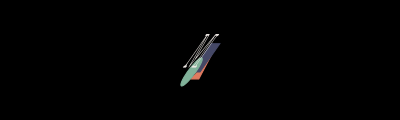

In [55]:
%%manim $parambigger
class Example(Scene):
    def construct(self):
        m= ManimBanner().scale(0.5)
        m.apply_matrix([[0.3, 0.7], [0, 1]])
        self.add(m)

## Colors and Opacity

When it comes to colors and opacity, there are more than one way to do things. Some of them are good and some should be avoided. Here is a brief overview:

<ul>
<li><div class="line-block">
<div class="line">Color parameters for Mobjects are <code ><span class="pre">stroke_color</span></code>, <code ><span class="pre">fill_color</span></code> and <code ><span class="pre">color</span></code>. The parameter <code ><span class="pre">color</span></code> automatically sets both <code ><span class="pre">stroke_color</span></code> and <code ><span class="pre">fill_color</span></code>.</div>
<div class="line">The recommended ways to set <strong>colors</strong> are via <code ><span class="pre">c</span> <span class="pre">=</span> <span class="pre">Circle(fill_color=</span> <span class="pre">BLUE,</span> <span class="pre">fill_opacity=</span> <span class="pre">1</span> <span class="pre">)</span></code> , <code ><span class="pre">c.set_fill(color=RED)</span></code> or <code ><span class="pre">c.set_style(fill_color=GREEN)</span></code></div>
<div class="line">Not possible are <code ><span class="pre">c.fill_color=YELLOW</span></code> , <code ><span class="pre">c.set(fill_color=YELLOW)</span></code> and <code ><span class="pre">c.set_fill_color(YELLOW)</span></code></div>
</div>
</li>
<li><div class="line-block">
<div class="line">Opacity parameters for Mobjects are <code ><span class="pre">fill_opacity</span></code> and <code ><span class="pre">stroke_opacity</span></code> (there is <strong>not</strong> <code ><span class="pre">opacity</span></code> here).</div>
<div class="line">The recommended ways to set <strong>opacity</strong> are via <code ><span class="pre">c</span> <span class="pre">=</span> <span class="pre">Circle(fill_color=</span> <span class="pre">BLUE,</span> <span class="pre">fill_opacity=</span> <span class="pre">0.5</span> <span class="pre">)</span></code> , <code ><span class="pre">c.set_fill(color=RED)</span></code> or <code ><span class="pre">c.set_style(fill_color=GREEN)</span></code></div>
<div class="line">Analog to colors, <code ><span class="pre">c.fill_opacity=1</span></code>, <code ><span class="pre">c.set(fill_opacity=1)</span></code> and <code ><span class="pre">c.set_fill_opacity(1)</span></code> are not possible. (to keep things short, these examples are not shown).</div>
</div>
</li>
</ul>

### Colors

First, we'll give examples of some "good" ways:

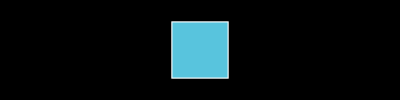

In [56]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1 )
        self.add(c)

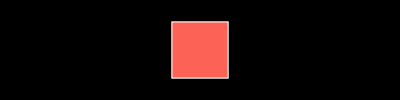

In [57]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1)
        c.set_fill(color=RED)
        self.add(c)

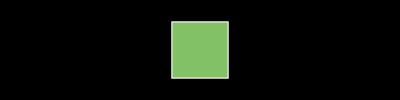

In [58]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_color= BLUE, fill_opacity= 1)
        c.set_style(fill_color=GREEN)
        self.add(c)

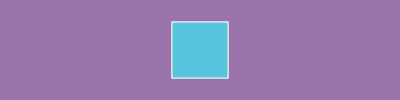

In [59]:
%%manim $param
class Example(Scene):
    def construct(self):
        self.camera.background_color = PURPLE
        self.add(Square(fill_color= BLUE, fill_opacity= 1))

However, the followings should be avoided:

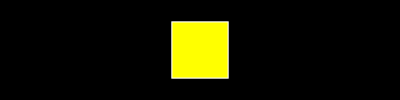

In [60]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.fill_color=YELLOW
        self.add(c)

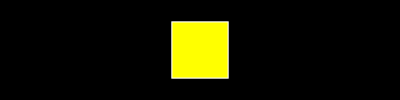

In [61]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.set(fill_color=YELLOW)
        self.add(c)

<string>:4: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


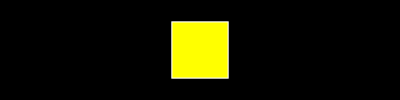

In [62]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Square(fill_opacity= 1)
        c.set_fill_color(YELLOW)
        self.add(c)

We even get a depreciation warning when we use the `set_fill_color` method.

### Opacitiy

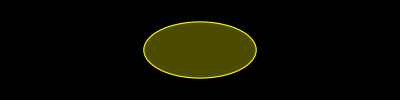

In [63]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW, fill_opacity=0.3).scale(2)
        self.add(c)

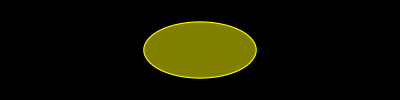

In [64]:
%%manim  $param
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW).scale(2)
        c.set_fill(opacity=0.5) # be careful: here, it must be `opacity` and not `fill_opacity` !
        self.add(c)

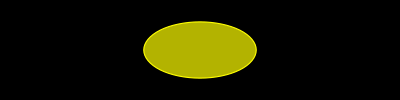

In [65]:
%%manim  $param
class Example(Scene):
    def construct(self):
        c = Ellipse(color= YELLOW).scale(2)
        c.set_style(fill_opacity=0.7) # and here, it must be `fill_opacity` and not `opacity` !
        self.add(c)

>Note that for opacity, if you are applying it while creating the object or by `set_style`, the parameter is `fill_opacity`. However, if you are applying it by `set_fill`, the parameter is `opacity`.

### Stroke Width

Just like with color and opacity, strokes can be set in multiple ways. The recommended ways are via `Circle(stroke_width=30)` , `c.set_stroke(width = 30)` or `c.set_style(stroke_width= 30)`. Also possible, but not the best solution is `c.stroke_width = 30` and `c.set(stroke_width = 30)`

Also possible, but not recommended because deprecated is `c.set_stroke_width(30)`

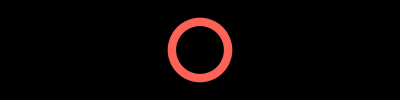

In [66]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle(stroke_width=30)
        self.add(c)

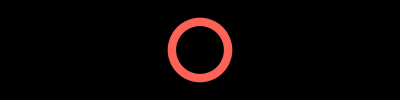

In [67]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_stroke(width = 30)
        self.add(c)

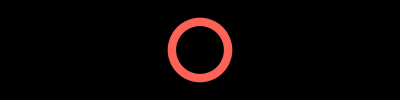

In [68]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_style(stroke_width= 30)
        self.add(c)

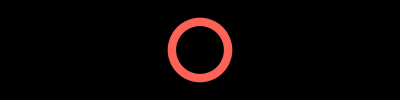

In [69]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle()
        c.stroke_width = 30
        self.add(c)

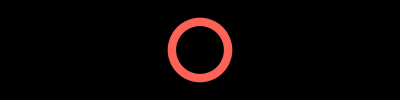

In [70]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set(stroke_width = 30)
        self.add(c)

<string>:4: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


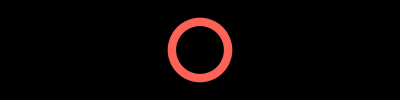

In [71]:
%%manim $param
class Example(Scene):
    def construct(self):
        c = Circle()
        c.set_stroke_width(30)
        self.add(c)

There are some more things which we need to discuss.

## Layers

Layer is the order in which the mobjects are drawn. manim provides mainly two ways to change the layers in Mobjects:

1. Reordering the list of submobjects that where added
2. Using the `z_index` parameter.

### submobjects

In the first case, we can use the methods `bring_to_front` and `send_to_back` to change the layer of a mobject.

A scene stores displayed mobjects in a list. They are displayed in the order that they are added to the scene with the syntax `self.add(circleLeft,circleRight)` First, we have a look on positioning mobjects with `self.add` and the methods `self.bring_to_back` and `self.bring_to_front`.

In [72]:
circleLeft = Circle(color=BLUE, fill_opacity=1)
circleRight = Circle(color=ORANGE,fill_opacity=1).shift(RIGHT)
line = Line(2*LEFT,3*RIGHT,color=YELLOW, stroke_width=20)

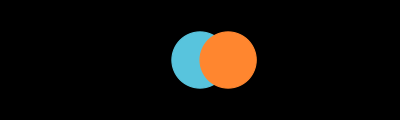

In [73]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight)

We see that the left circle, which is added first is displayed behind the right circle. If we change the orders, we get:

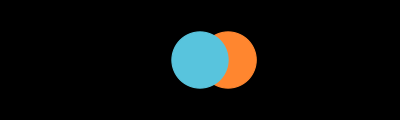

In [74]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(circleRight,circleLeft)

Let's add the line too:

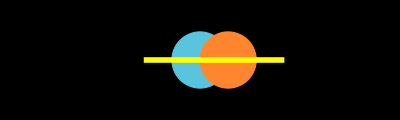

In [75]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)

So, the order of the mobjects is as follows:

1. line
2. Right circle
3. Left circle

Now, we will use the methods `self.bring_to_back` and `self.bring_to_front` to change the order of the mobjects.

[Circle, Circle, Line]
[Line, Circle, Circle]


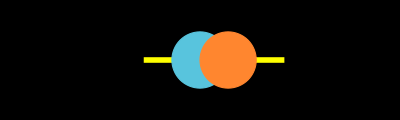

In [76]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)
        print(self.mobjects)
        self.bring_to_back(line)
        print(self.mobjects)

As the line as brought to back, it is displayed behind the circles. The circles are still in the same order. The order can also be seen from the list printed.

[Circle, Circle, Line]
[Circle, Line, Circle]


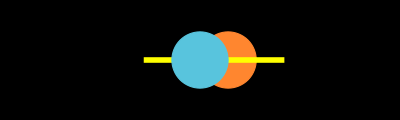

In [77]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(circleLeft,circleRight, line)
        print(self.mobjects)
        self.bring_to_front(circleLeft)
        print(self.mobjects)

### z_index

The default z_index is 0. Now we will see what happens, when we increase the value of the z_index.

The z_index can be changed by 

- `triangle = Triangle(z_index=1)`,
- `triangle.z_index=1` , 
- `triangle.set(z_index=1)` and 
- `triangle.set_z_index(1)`.

However, the last two are not recommended.

In [78]:
#initilizing line,circle,square and triangle
BUFF= 0.5*DOWN
line = Line(3*LEFT,3*RIGHT,color=YELLOW, stroke_width=20)
circle = Circle(color=GREEN_D, fill_opacity=1).shift(LEFT+BUFF)
square = Square(color=BLUE_D, fill_opacity=1).shift(UP+BUFF)
triangle = Triangle(color=RED_D, fill_opacity=1).shift(RIGHT+BUFF)

[Line, Triangle, Square, Circle]
triangle.z_index=0 , square.z_index=0 , circle.z_index=0 , line.z_index=0


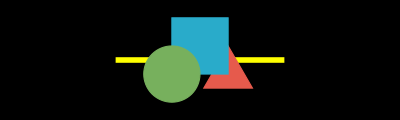

In [79]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        self.add(line,triangle, square, circle)  # order matters
        print(self.mobjects)
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")

Since we have not mentioned the `z_index`, they are all set to 0.

[Triangle, Square, Circle, Line]
triangle.z_index=1 , square.z_index=0 , circle.z_index=0 , line.z_index=0


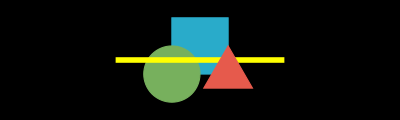

In [80]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        triangle.z_index=1
        self.add(triangle, square, circle,line)  # order matters
        print(self.mobjects)
        print(f"{triangle.z_index=} , {square.z_index=} , {circle.z_index=} , {line.z_index=}")

Note that the `z_index` of the traingle is set to 1 and hence it has come to front.

line.z_index=0


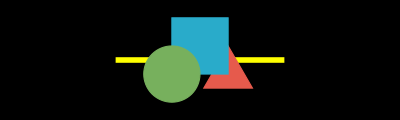

In [81]:
%%manim  $parambigger
class Example(Scene):
    def construct(self):
        triangle.z_index = 1
        square.z_index   = 2
        circle.z_index   = 3
        self.add(triangle, square, circle,line)  # order matters
        print(f"{line.z_index=}")

As the `z_index` of the line is the lowest, it has pushed to the back.

## Some More Things

There are some more concepts we need to discuss before we can move to the animation part.

### `VGroup`

In manim `VGroup` is a group of VMobjects. It is used to group multiple mobjects together. This way, the same transformation can be applied to all the mobjects in the group.

In [82]:
#only for setup
def create_dots():
    blue1_ref= Dot(color= BLUE,       point=[-.3,-.5,0], radius=0.5)
    blue2_ref= Dot(color= BLUE_A,     point=[ .3,-.5,0], radius=0.5)
    yellow1_ref= Dot(color= YELLOW,   point=[-.3, .5,0], radius=0.5)
    yellow2_ref= Dot(color= YELLOW_A, point=[ .3, .5,0], radius=0.5)
    return blue1_ref, blue2_ref,yellow1_ref,yellow2_ref

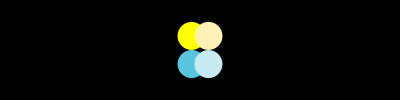

In [83]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        self.add(blue1,blue2, yellow1,yellow2)

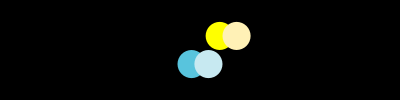

In [84]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        VGroup(yellow1,yellow2).shift(RIGHT)
        self.add(blue1,blue2, yellow1,yellow2)

Using `VGroup`, we are able to move the top two circles together. After grouping, you can use the same methods as you would use for a single mobject. For example:

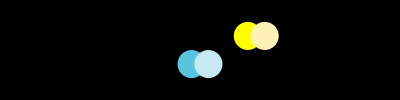

In [85]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(2*RIGHT)
        self.add(blue1,blue2, g1)

We see that while adding, we have passed `g1`, which is a `VGroup` object created using the top two circles. We can also add a single mobject to a `VGroup` object.

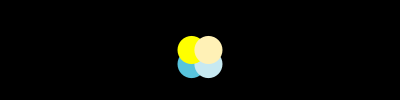

In [86]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        g2=VGroup(blue1,blue2)
        self.add(g2,g1)

You can even create `VGroup` objects using `VGroup` objects. You can see the mobjects in the `VGroup` object by using the `submobjects` attribute and simple list indexing.

[VGroup(Dot, Dot), VGroup(Dot, Dot)]
[Dot, Dot]
[Dot, Dot]


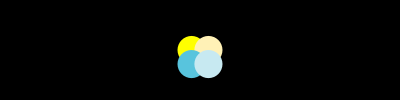

In [87]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # Groups of Groups
    def construct(self):
        g1=VGroup(yellow1,yellow2).shift(0.5*DOWN)
        g2=VGroup(blue1,blue2)
        gAll = VGroup(g1, g2)
        self.add(gAll)
        print(gAll.submobjects)
        print(gAll.submobjects[0].submobjects)
        print(gAll.submobjects[1].submobjects)

If you already have a `VGroup` object, you can add more mobjects to it using the `add` method. You can also use the `+=` operator.

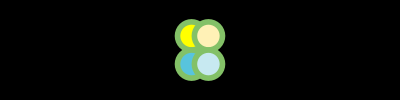

In [88]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # add syntax
    def construct(self):
        g=VGroup(yellow1,yellow2,blue1)
        g.add(blue2) # <--
        g.set_stroke(color=GREEN, width=20)
        self.add(g)

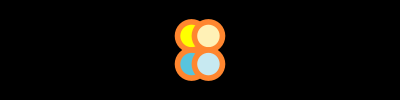

In [89]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # += Syntax
    def construct(self):
        g=VGroup(yellow1,yellow2,blue1)
        g += blue2 # <--
        g.set_stroke(color=ORANGE, width=20)
        self.add(g)

A `VGroup` and also be initialized empty:

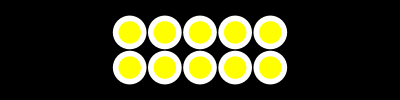

In [90]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): # empty initilizing
    def construct(self):
        g=VGroup()
        for _ in range(0,10):
            g += yellow1.copy()
        g.set_stroke(color=WHITE, width=20)
        g.arrange_in_grid(rows=2)
        g.move_to(ORIGIN)
        self.add(g)

> The Groups and VGroups can be arranged in grids. We saw this earlier.

What's more is that Mobjects can be added to any other Mobject.

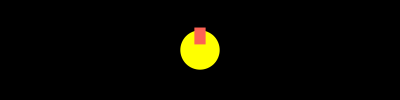

In [91]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene):  # other Mobjects can be added to any Mobjects
    def construct(self):
        d= Dot(color= YELLOW, radius=0.7)
        d.add(Line(0.2*UP, 0.8*UP, color=RED,stroke_width=40))
        self.add(d)

Note that in `VGroup`, you can add only `VMobject` objects. If you try to add a `Mobject` object, you will get an error. For example:

Adding an Mobject to a VGroup is not possible!


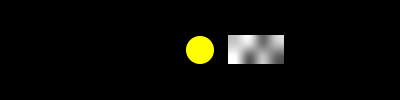

In [92]:
%%manim $param
dot= Dot(color= YELLOW, radius=0.5)
image = ImageMobject(np.uint8([[200, 233, 111, 200],
                               [255, 100, 190, 100]])).shift(2*RIGHT)
image.height = 1
class Example(Scene):
    def construct(self):
        self.add(dot, image)
        try: # Image is not a VMobject!
            VGroup(dot,image).shift(3*RIGHT)
        except TypeError:
            print("Adding an Mobject to a VGroup is not possible!")

### Group

As we saw, `Vgroup` does not allow `Mobject` objects. However, `Group` does. `Group` is a group of `Mobjects` as well as `VMobject`. However, you can use only those methods which are supported by `Mobjects`, methods supported by `VMobjects` will not work.

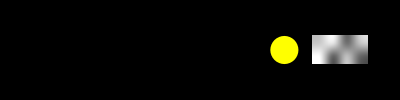

In [93]:
%%manim $param
dot= Dot(color= YELLOW, radius=0.5)
image = ImageMobject(np.uint8([[200, 233, 111, 200],
                               [255, 100, 190, 100]])).shift(2*RIGHT)
image.height = 1
class Example(Scene):
    def construct(self):
        self.add(dot, image)
        Group(dot,image).shift(3*RIGHT)

TypeError!


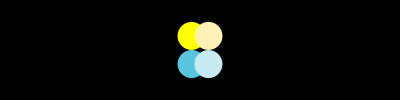

In [94]:
%%manim $param
blue1,blue2, yellow1,yellow2 = create_dots()
class Example(Scene): #
    def construct(self):
        g=Group(yellow1,yellow2,blue1,blue2)
        try:
            g.set_stroke(color=PURPLE_D, width=20)
        except TypeError:
            print("TypeError!")
        self.add(g)

Since `set_stroke` is a method of `VMobject`, it will not work. 

>Please note that `z_index` is not supported, neither for `VGroup` nor for `Group`.

### Making Mobject Classes

You often need to draw some Mobjects again and again. This is where classes come in. You can create your own Mobject classes. For example, if you want to draw a crescent moon, you can create a class for it. In fact, let's do it!

In [95]:
param   = "-v WARNING -s -r 300,100 --disable_caching --progress_bar None Example"

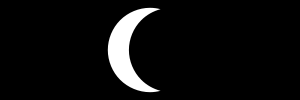

In [96]:
%%manim $param
class Example(Scene):
    def construct(self):
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1,stroke_width=0)
        self.add(diff)

Let's create the class:

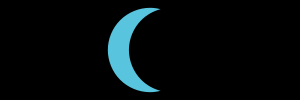

In [97]:
%%manim $param
class Moon(VGroup):
    def __init__(self):
        super().__init__()
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1,stroke_width=0, fill_color=BLUE)
        self.add(diff)

class Example(Scene):
    def construct(self):
        m = Moon()
        self.add(m)

We have inherited from `VGroup` for this example, but you can also inherit from `Group` or `VMobject`.  It depends on what class features you want to use when choosing the classtype. `VGroup` is recommended.

For example, the below code would work:

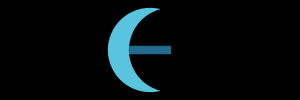

In [98]:
%%manim $param
class Moon(VGroup):
    def __init__(self):
        super().__init__()
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1,stroke_width=0, fill_color=BLUE)
        self.add(diff)

class Example(Scene):
    def construct(self):
        m = Moon()
        m += Line(stroke_width=40, color=BLUE_E)
        self.add(m)

However, if we inherit from `VMobject`, we will get an error:

In [99]:
%%manim $param
class Moon(VMobject): # <- Try what happens when you change it to VMobject
    def __init__(self):
        super().__init__()
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1,stroke_width=0, fill_color=BLUE)
        self.add(diff)

class Example(Scene):
    def construct(self):
        m = Moon()
        m += Line(stroke_width=40, color=BLUE_E)
        self.add(m)

NotImplementedError: 

This happens beacuse the `VMobject` class does not have the `+=` operator.

You can use `add` though, and it will work:

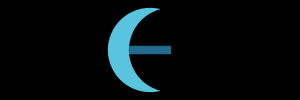

In [100]:
%%manim $param
class Moon(VGroup): # <- Try what happens when you change it to VMobject
    def __init__(self):
        super().__init__()
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1,stroke_width=0, fill_color=BLUE)
        self.add(diff)

class Example(Scene):
    def construct(self):
        m = Moon()
        m.add(Line(stroke_width=40, color=BLUE_E))
        self.add(m)

In reality, you usally create a class which takes some parameter. For example, you might want to create the crescent moon with different colors. You can do that by adding a parameter to the class. For example:

In [101]:
class Moon(VGroup):
    def __init__(self,moon_color): 
        super().__init__()
        d1 = Dot(point= [0,0,0], radius=2)
        d2 = Dot(point= [1,0,0], radius=2)
        diff = Difference(d1,d2,fill_opacity=1, fill_color= moon_color)
        self.add(diff)

Now, we can create a crescent moon with different colors. Let's try a yellow one:

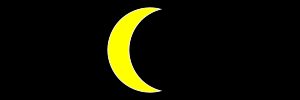

In [102]:
%%manim $param

class Example(Scene):
    def construct(self):
        m = Moon(moon_color=YELLOW)
        self.add(m)

Or a red moon!

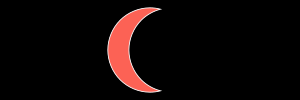

In [103]:
%%manim $param

class Example(Scene):
    def construct(self):
        m = Moon(moon_color=RED)
        self.add(m)